<a href="https://colab.research.google.com/github/morerule/DS6_DL/blob/main/dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import glob
import numpy as np
import os

def load_and_resize_all(img_root, target_size=(28,28)):
    classes = ['scissor', 'rock', 'paper']
    data = []
    labels = []

    for label, cls in enumerate(classes):
        img_path = os.path.join(img_root, cls)
        images = glob.glob(img_path + "/*.*")
        print(cls, ":", len(images), " images found.")

        for img in images:
            old_img = Image.open(img)
            new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
            data.append(np.array(new_img))
            labels.append(label)  # 가위=0, 바위=1, 보=2

    print("총", len(data), " images loaded and resized.")
    return np.array(data), np.array(labels)

# 1. 학습 데이터 로드
train_dir = "/content"
x_train, y_train = load_and_resize_all(train_dir, target_size=(28,28))
x_train_norm = x_train / 255.0

# 2. 테스트 데이터 로드
test_dir = "/content/test"
x_test, y_test = load_and_resize_all(test_dir, target_size=(28,28))
x_test_norm = x_test / 255.0

print("훈련 데이터:", x_train.shape, y_train.shape)
print("테스트 데이터:", x_test.shape, y_test.shape)


scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
훈련 데이터: (300, 28, 28, 3) (300,)
테스트 데이터: (300, 28, 28, 3) (300,)


In [3]:
import numpy as np

def load_data(img_path):
    img_size = 28
    color = 3
    data = []
    labels = []

    for file in glob.iglob(img_path+'/scissor/*.*'):
        img = Image.open(file).resize((28,28), Image.Resampling.LANCZOS)
        data.append(np.array(img, dtype=np.int32))
        labels.append(0)

    for file in glob.iglob(img_path+'/rock/*.*'):
        img = Image.open(file).resize((28,28), Image.Resampling.LANCZOS)
        data.append(np.array(img, dtype=np.int32))
        labels.append(1)

    for file in glob.iglob(img_path+'/paper/*.*'):
        img = Image.open(file).resize((28,28), Image.Resampling.LANCZOS)
        data.append(np.array(img, dtype=np.int32))
        labels.append(2)

    print("총 이미지 개수:", len(data))
    return np.array(data), np.array(labels)

image_dir_path = "/content"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

총 이미지 개수: 300
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [4]:
# 학습 데이터
train_dir = "/content"
x_train, y_train = load_data(train_dir)
x_train_norm = x_train / 255.0

# 테스트 데이터
test_dir = "/content/test"
x_test, y_test = load_data(test_dir)
x_test_norm = x_test / 255.0


총 이미지 개수: 300
총 이미지 개수: 300


In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,707 (877.76 KB)

 Trainable params: 224,707 (877.76 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3355 - loss: 1.1241
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3418 - loss: 1.0986
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4305 - loss: 1.0879
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5616 - loss: 1.0720
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5126 - loss: 1.0546
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7098 - loss: 1.0288
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6712 - loss: 0.9815
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7462 - loss: 0.8944
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7427 - loss: 0.7965
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8059 - loss: 0.6967
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8098 - loss: 0.6212
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy:

In [7]:
image_dir_path = "/content/test/"
load_and_resize_all(image_dir_path)

image_dir_path = "/content/test/"
load_and_resize_all(image_dir_path)

image_dir_path = "/content/test/"
load_and_resize_all(image_dir_path)

image_dir_path = "/content/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test / 255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
총 이미지 개수: 300
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [8]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 32ms/step - accuracy: 0.2800 - loss: 7.9445
test_loss: 7.944491386413574 
test_accuracy: 0.2800000011920929


정확도가 0.2800

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

n_channel_1 = 64
n_channel_2 = 128
n_dense = 256
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 학습 끝난 뒤 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 895,875 (3.42 MB)

 Trainable params: 895,875 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.3491 - loss: 1.1528
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3001 - loss: 1.0995
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.3898 - loss: 1.0979
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.4116 - loss: 1.0950
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.3908 - loss: 1.0913
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5433 - loss: 1.0859
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4030 - loss: 1.0653
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6220 - loss: 1.0333
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7363 - loss: 0.9587
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7802 - loss: 0.8191
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7386 - loss: 0.6911
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accurac

n_channel_1 = 64
n_channel_2 = 128
n_dense = 256
수정했지만 오히려 정확도 0.2666 더낮아짐


In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.BatchNormalization())   # 안정화
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 학습 끝난 뒤 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,835 (878.26 KB)

 Trainable params: 224,771 (878.01 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4252 - loss: 1.0781
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8730 - loss: 0.3843
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9730 - loss: 0.1529
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9912 - loss: 0.0750
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9978 - loss: 0.0345
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 1.0000 - loss: 0.0184
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 1.0000 - loss: 0.0101
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0076
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0047
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0032
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy:

n_channel_1 = 32
n_channel_2 = 64
n_dense = 128 다시 바꾸고 BatchNormalization추가 정확도는 추가 안한게 좋음

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 학습 끝난 뒤 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,707 (877.76 KB)

 Trainable params: 224,707 (877.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3644 - loss: 1.1032
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3247 - loss: 1.1032
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3774 - loss: 1.0988
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4624 - loss: 1.0835
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3959 - loss: 1.0822
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5295 - loss: 1.0399
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4301 - loss: 1.0457
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6658 - loss: 0.9535
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6904 - loss: 0.8897
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6926 - loss: 0.8378
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7755 - loss: 0.7423
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy:

BatchNormalization 제거후 Dropout추가 정확도 약간 상승

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 학습 끝난 뒤 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,835 (878.26 KB)

 Trainable params: 224,771 (878.01 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4722 - loss: 1.0280
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7785 - loss: 0.5593
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9015 - loss: 0.2825
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9232 - loss: 0.2303
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9746 - loss: 0.1551
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9713 - loss: 0.1201
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9862 - loss: 0.0507
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9960 - loss: 0.0326
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9978 - loss: 0.0189
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9942 - loss: 0.0361
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9973 - loss: 0.0195
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy:

Dropout포함해서 BatchNormalizatio 다시 추가하니 최저점 달성
BatchNormalizatio추가하면 학습은 빠름 3회만에 학습0.9달성

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

# 이미지 크기 변경
img_size = 64

n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 5

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
from PIL import Image
import glob, os

def load_and_resize_all(img_root, target_size=(img_size,img_size)):
    classes = ['scissor','rock','paper']
    data, labels = [], []
    for label, cls in enumerate(classes):
        img_path = os.path.join(img_root, cls)
        images = glob.glob(img_path + "/*.*")
        print(cls, ":", len(images), " images found.")
        for img in images:
            old_img = Image.open(img)
            new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
            data.append(np.array(new_img))
            labels.append(label)
    print("총", len(data), " images loaded and resized.")
    return np.array(data), np.array(labels)

# -----------------------------
# 학습 데이터 로드
train_dir = "/content"
x_train, y_train = load_and_resize_all(train_dir, target_size=(img_size,img_size))
x_train_norm = x_train / 255.0

# 테스트 데이터 로드
test_dir = "/content/test"
x_test, y_test = load_and_resize_all(test_dir, target_size=(img_size,img_size))
x_test_norm = x_test / 255.0

# -----------------------------
# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 학습 끝난 뒤 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,667 (6.20 MB)

 Trainable params: 1,625,603 (6.20 MB)

 Non-trainable params: 64 (256.00 B)

scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.4227 - loss: 2.0823
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.8371 - loss: 0.4496
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.9521 - loss: 0.1981
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.9708 - loss: 0.1116
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.9840 - loss: 0.0945
10/10 - 1s - 116ms/step - accuracy: 0.4100 - loss: 1.0761
test_loss: 1.0761395692825317 
test_accuracy: 0.4099999964237213


해상도 높이니까 좋아짐

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,835 (28.20 MB)

 Trainable params: 7,392,771 (28.20 MB)

 Non-trainable params: 64 (256.00 B)

scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3900 - loss: 4.3022 - val_accuracy: 0.3200 - val_loss: 1.0912
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7278 - loss: 0.9371 - val_accuracy: 0.3767 - val_loss: 1.0879
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9154 - loss: 0.2262 - val_accuracy: 0.4000 - val_loss: 1.0934
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9656 - loss: 0.1167 - val_accuracy: 0.4567 - val_loss: 1.0936
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9584 - loss: 0.0891 - val_accuracy: 0.5633 - val_loss: 1.0901
10/10 - 3s - 286ms/step - accuracy: 0.5633 - loss: 1.0901
test_loss: 1.0900990962982178 
test_accuracy: 0.5633333325386047


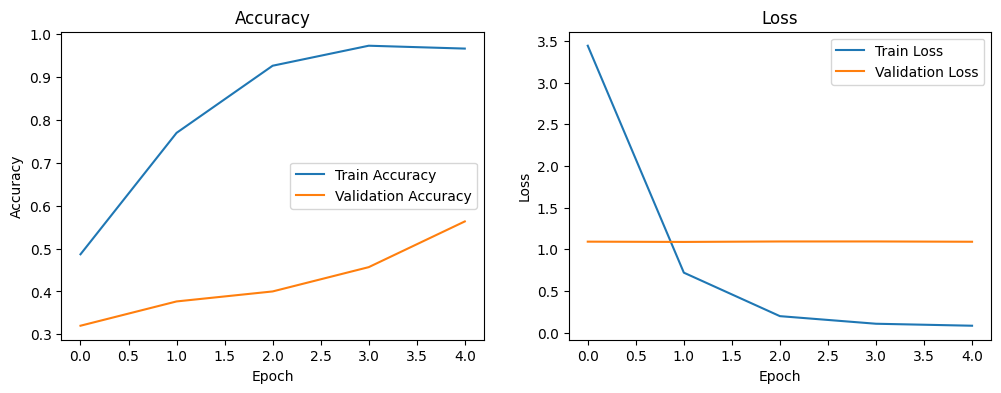

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 이미지 크기 변경
img_size = 128

n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 5

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
from PIL import Image
import glob, os

def load_and_resize_all(img_root, target_size=(img_size,img_size)):
    classes = ['scissor','rock','paper']
    data, labels = [], []
    for label, cls in enumerate(classes):
        img_path = os.path.join(img_root, cls)
        images = glob.glob(img_path + "/*.*")
        print(cls, ":", len(images), " images found.")
        for img in images:
            old_img = Image.open(img)
            new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
            data.append(np.array(new_img))
            labels.append(label)
    print("총", len(data), " images loaded and resized.")
    return np.array(data), np.array(labels)

# -----------------------------
# 학습 데이터 로드
train_dir = "/content"
x_train, y_train = load_and_resize_all(train_dir, target_size=(img_size,img_size))
x_train_norm = x_train / 255.0

# 테스트 데이터 로드
test_dir = "/content/test"
x_test, y_test = load_and_resize_all(test_dir, target_size=(img_size,img_size))
x_test_norm = x_test / 255.0

# -----------------------------
# 모델 훈련 (history 저장)
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch,
                    validation_data=(x_test_norm, y_test))

# 학습 끝난 뒤 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# -----------------------------
# 학습 과정 시각화
plt.figure(figsize=(12,4))

# 정확도 그래프
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


해상도는 128로 높였지만 정확도 상승폭은 적음

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,510,083 (120.20 MB)

 Trainable params: 31,510,019 (120.20 MB)

 Non-trainable params: 64 (256.00 B)

scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
scissor : 100  images found.
rock : 100  images found.
paper : 100  images found.
총 300  images loaded and resized.
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 8s/step - accuracy: 0.3517 - loss: 16.5836 - val_accuracy: 0.4533 - val_loss: 2.2459
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - accuracy: 0.6716 - loss: 2.7784 - val_accuracy: 0.2967 - val_loss: 1.0935
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.8866 - loss: 0.4352 - val_accuracy: 0.2933 - val_loss: 1.0954
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - accuracy: 0.9218 - loss: 0.2050 - val_accuracy: 0.3967 - val_loss: 1.1002
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.9510 - loss: 0.1571 - val_accuracy: 0.4433 - val_loss: 1.1002
10/10 - 20s - 2s/step - accuracy: 0.4433 - loss: 1.1002
test_loss: 1.100151777267456 
test_accuracy: 0.44333332777023315


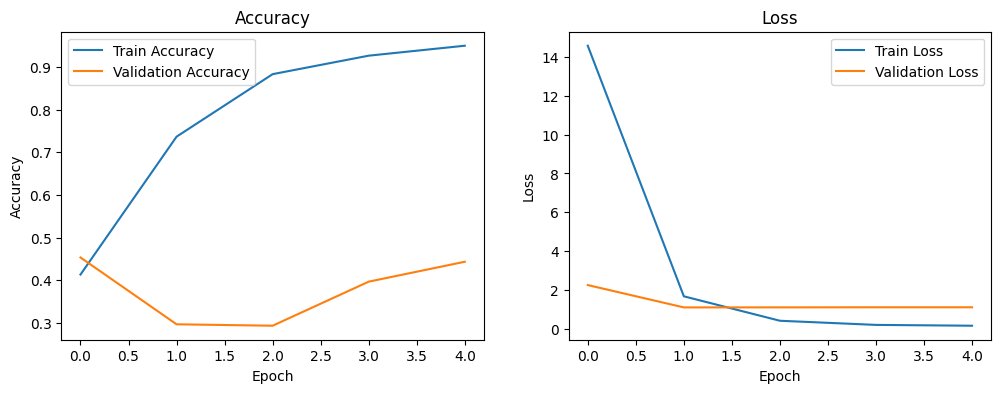

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 이미지 크기 변경
img_size = 256

n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 5

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
from PIL import Image
import glob, os

def load_and_resize_all(img_root, target_size=(img_size,img_size)):
    classes = ['scissor','rock','paper']
    data, labels = [], []
    for label, cls in enumerate(classes):
        img_path = os.path.join(img_root, cls)
        images = glob.glob(img_path + "/*.*")
        print(cls, ":", len(images), " images found.")
        for img in images:
            old_img = Image.open(img)
            new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
            data.append(np.array(new_img))
            labels.append(label)
    print("총", len(data), " images loaded and resized.")
    return np.array(data), np.array(labels)

# -----------------------------
# 학습 데이터 로드
train_dir = "/content"
x_train, y_train = load_and_resize_all(train_dir, target_size=(img_size,img_size))
x_train_norm = x_train / 255.0

# 테스트 데이터 로드
test_dir = "/content/test"
x_test, y_test = load_and_resize_all(test_dir, target_size=(img_size,img_size))
x_test_norm = x_test / 255.0

# -----------------------------
# 모델 훈련 (history 저장)
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch,
                    validation_data=(x_test_norm, y_test))

# 학습 끝난 뒤 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# -----------------------------
# 학습 과정 시각화
plt.figure(figsize=(12,4))

# 정확도 그래프
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


해상도는 256로 높였지만 정확도 오히려 하락